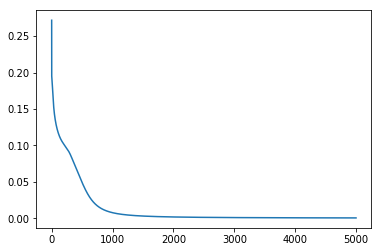

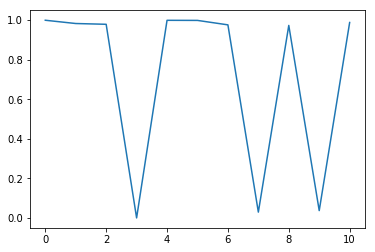

In [43]:
#========================================================
# Training program with back propagration to train MLP
#========================================================

import numpy as np
import matplotlib.pyplot as plt

# Variable Declaration

inp = np.array([
    [3,3,2],
    [3,2,2],
    [3,2,1],
    [3,1,1],
    [2,3,2],
    [2,2,2],
    [2,2,1],
    [2,1,1],
    [1,3,2],
    [1,2,1],
    [1,1,2]
])


out = np.array([
    [1,1,1,0,1,1,1,0,1,0,1]
]).T

total_input = len(inp[:,1]) # Number of all input nodes (11)
node_input = len(inp[1,:]) # Dimension of training pattern (3)
neuron_output = len(out[1,:]) # Dimension of output neurons (1)

neuron_hidden = 5 # Dimension of hidden neurons
learning_rate = 0.5 # alpha, learning rate
Epoch = 5000 # maximum iteration
MaxMSE = 10^-5 # maximum mean square error

# deterministic random(just a good practice)
np.random.seed(0)

#================================================================
# Declare the weights (W1) between input layer and Hidden Layer randomly
# in interval -1 through +1
#================================================================

W1 = np.random.random((node_input, neuron_hidden))*2-1

#================================================================
# Declare the weights (W1) between Hidden Layer and Output layer randomly
# in interval -1 through +1
#================================================================

W2 = np.random.random((neuron_hidden, neuron_output))*2-1

MSEepoch = MaxMSE + 1
MSE = []
ee = 1
iter=1

# sigmoid function, gives a value between 0 - 1
def sig(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

#=================================================================
# Start training
#=================================================================

while( ee <= Epoch) and ( MSEepoch > MaxMSE):
    MSEepoch = 0

    l0 = inp
    l1 = sig(np.dot(l0, W1))
    l2 = sig(np.dot(l1, W2))
    
    l2_error = out - l2
    
    MSEepoch += np.sum(l2_error**2)
    
    l2_delta = l2_error*sig(l2,deriv=True) * learning_rate

    l1_error = l2_delta.dot(W2.T)

    l1_delta = l1_error * sig(l1,deriv=True) * learning_rate

    W2 += l1.T.dot(l2_delta)
    W1 += l0.T.dot(l1_delta)
    
    MSE.append(MSEepoch/total_input)
    ee+=1

plt.plot(MSE)
plt.show()
plt.plot(l2)
plt.show()